# **Fraud Detection on Transactions**
Data base: https://www.kaggle.com/code/llabhishekll/fraud-transaction-detection/input

The objective of this analysis, is to develop a model that can be capable of identifing if a transaction is a fraud or not.
For this we are going to be doing the following steps:


*   Exploratory Analysis;
*   Finding the features that have an important imoact to the fraud detecion;
*   Presenting the confusion matrix, accuracy, precision and recall scores;
*   Develop models based on the KNN, Logistic Regression and Decision Tree algorithms;
*   Make ajustments to the models so it can have a improved performance.







First things first we are going to be importing the first tools and libraries that we will be using, which are:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Now we are going to import our database and saving it as **df**, short for DataFrame. And we will be seeing the first columns and rows with the **df.head()** method.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Detect Fraud/PS_20174392719_1491204439457_log.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


To see if we have null values in the dataset lets use the **.isnull()** combined with **.any()** method, that will give us the following:

In [ ]:
df.isnull().any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

Here we see our first big information, we do not have **any** null data on our dataset.
For learning purposes, this is something you will probably not see in a day to day analysis, but if you do, that would save a lot of time, since you won't need to replace the data.

For better understanding of the data and to see where we can find fraudulent transactions, lets see all the types of Transactions that we have, using the **.unique()** method on the column type.

In [ ]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

Now that we know that there is only 5 types of payment on all the transactions, we can analyse the amount of money of each transaction on the dataset. With this we can better understand where most of the frauds are happening.
We will be using a bar plot to see this amounts, since it is easy to see 5 values in a bar chart.

<Axes: xlabel='type'>

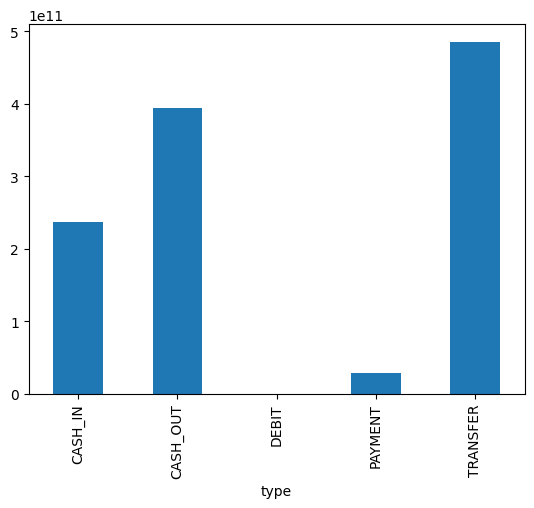

In [ ]:
barplot = df.groupby('type').amount.sum()
fig = plt.figure()
ex = fig.add_subplot(1,1,1)
barplot.plot(kind='bar')

Presumably we can notice that the payment and debit types are pretty much non present on our dataset, for better understatanding, it means that they are more likely to not contain the fraudulent transactions since they are small in comparison to the others, debit in specific we can`t even see.

To confirm that we can see how many frauds actually happend in this types of transactions compared to all of the frauds, lets do the following:



*   Transform the data from Strings to Int so we can better analyse. We can make that with the method **.replace**

*   Check and save how many frauds there is on our dataset and save it to teh variable **sum_frauds**;
*   Then, compare this total to the (debit + payment) sum of frauds.



In [ ]:
df = df.replace(to_replace={'PAYMENT':1,'TRANSFER':2,'CASH_OUT':3,'CASH_IN':4,'DEBIT':5,'No':0,'Yes':1})

In [ ]:
sum_frauds = (df["isFraud"] == 1).sum()
print("Total frauds on the dataset: {}.".format(sum_frauds))

Total frauds on the dataset: 8213.


In [ ]:
debit_fraud_sum = df[(df['type'] == 5) & (df['isFraud'] == 1)].isFraud.sum()
payment_fraud_sum = df[(df["type"] == 1) & (df["isFraud"] == 1)].isFraud.sum()
sum_debit_payment = debit_fraud_sum + payment_fraud_sum
print("Total sum of debit + payment frauds is: {}.".format(sum_debit_payment))
print("So for all the debits and payments we have a ratio of: 0:{} frauds.".format(sum_frauds))

Total sum of debit + payment frauds is: 0.
So for all the debits and payments we have a ratio of: 0:8213 frauds.


Now, is there a better way to see if this happens for the other types of transactions even if they are much more used?
There acttualy is a way, we can use the same bar plot as above to see this.
But here, we will use the **isFraud** column to see each one of the type and if they are impacted by the frauds.

<Axes: xlabel='type'>

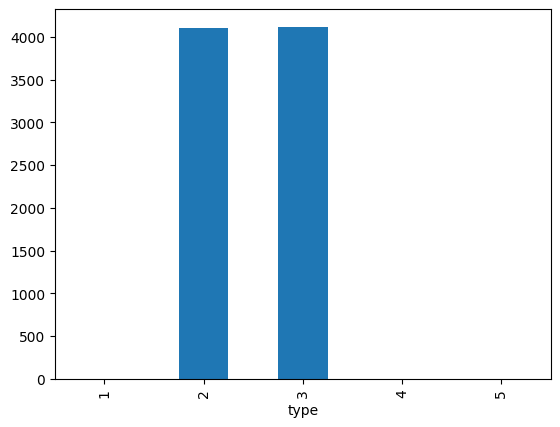

In [ ]:
barplot = df.groupby('type').isFraud.sum()
fig = plt.figure()
ex = fig.add_subplot(1,1,1)
barplot.plot(kind='bar')

**Wow, thats something interesting.**

So why is this so discrepant? Some arguments can be that, **Transfer** transactions are one of the most common practices of frauds in the world, they happen in impersonating situations of families and friends asking for money, thiefs steeling personal cards and cellphones, and so on.

For the **Cash outs**, we have a lot of impersonating and ATM`s devices to capture user cards information.

Lets sum all the fraud data and find out how many frauds there are in the Transfer and Cash_out methods.

Once there is just this two types of methods which are fraudulent, we can use the **sum_frauds** we used earlier.

So lets see how is the ratio of this frauds to the data that is not fraud, we can do that by dividing the **isFraud** == 0, by the **isFraud** == 1 or the **sum_frauds** we saw earlier.

In [ ]:
all_isFraud_data = (df["isFraud"] == 0).sum()
print("Ratio of frauds vs the whole data is 1:{}.".format(all_isFraud_data//sum_frauds))

Ratio of frauds vs the whole data is 1:773.


This is kinda concerning to the models we are going to train further on, once this shows that only one fraud happens in each 773 cases, this can lead us to fall in a **overfitting** condition where our model will train with a disbalanced dataset, leading us to one side, the non fraudulent transaction, missclassifing our new datain the future.

Once we have a column **isFlaggedFraud** lets see if this is something that is alreadly happening.

We can do this by divding **sum_frauds** by **isFlaggedFraud** and find the ratio just like we did above.


In [ ]:
is_Flagged_Fraud = (df["isFlaggedFraud"] == 1).sum()
print("Ratio of flagged frauds vs the actual amount of frauds is 1:{}.".format(sum_frauds//is_Flagged_Fraud))

Ratio of flagged frauds vs the actual amount of frauds is 1:513.


**Building our first model**

For our first model, we will be using as our data for training and testing the whole dataset, without any type of cleaning and changes to it.
For comparison measures we will be using the 3 model type we saw at the beggining (KNN, Logistic Regression and Decision Tree).
Lets import again our dataset and just transform the column types to numeric values so we can train the dataset.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Detect Fraud/PS_20174392719_1491204439457_log.csv')
df = df.replace(to_replace={'PAYMENT':1,'TRANSFER':2,'CASH_OUT':3,'CASH_IN':4,'DEBIT':5,'No':0,'Yes':1})

Now we import the libraries we will be using. And dropping the 3 columns that does not have any impact on the data, they are:


*   namOrig
*   nameDest
*   isFlaggedFraud

For explanation, the names columns doesn`t impact on the prediction, once frauds do not occur because of the name of the person. And the flaggedFraud is so irrelevant to the whole data that we can exclude it.





In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
df.drop(["nameOrig", "nameDest", "isFlaggedFraud"], axis = 1, inplace = True)


In [ ]:
X = df.drop(["isFraud"], axis =1)
y = df["isFraud"]

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.20, random_state = 42)

dt_model = DecisionTreeClassifier()

dt_probabilities = dt_model.fit(train_X, train_y).predict(val_X)

print(average_precision_score(val_y, dt_probabilities))


0.7882351842445192


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_probabilities = knn_model.fit(X, y).predict(val_X)

print(average_precision_score(val_y, knn_probabilities))

#3 minutos e 21 segundos

0.7249732424412186


In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state = 42).fit(X, y)
lr_probabilities = lr_model.predict(val_X)

print(average_precision_score(val_y, lr_probabilities))

#51 segundos

0.14853557709340046


**Insights**

So, we saw that the best model is the decision tree classifier, we were able to get a 78% score, wich is acctualy a good score. But when we are dealing with frauds, we need it to be as close to 100% as possible so we can identify the frauds and act on it before its to late to do something.

**How we can get better Scores?**

Well we can act on various ways, like:


*   Delete some of our data that represents the side of the rating wich is the non frauds data, to get a better ratio then 1:773;
*   Add more data to our side of the rating wich is the frauds data, making the rating go lower as well. We can do this by using methods like **SMOTE**, that creates syntatic data by taking the difference between a sample and its nearest neighbour multiplying the difference by a random number between 0-1 then add this difference to the sample to generate a new synthetic example then continue on with next nearest neighbour up to user-defined number. We can even a rating that we aim.
*   Study what the company wants and focus on only part of the data, getting better results, by stratifying the data. We can do that with the **stratifyed sample** statistic method.






We will be trying 2 of the 3 strategies, the deleting of some of our data, and the SMOTE strategy.

**Deleting Data**
This is not the safest bet to most of the cases but here we saw that we have some types of transactions that don`t even have frauds, so we will be experimeinting with deleting those types to see if we have a better ratio and a better model.

In [ ]:
type_cashin = df[(df["type"] == 4)]
type_cashin = type_cashin.type.count()
print(type_cashin)

1399284


In [ ]:
type_payment = df[(df["type"] == 1)]
type_payment = type_payment.type.count()
print(type_payment)

2151495


In [ ]:
type_debit = df[(df["type"] == 5)]
type_debit = type_debit.type.count()
print(type_debit)

41432


In [ ]:
sum_types = type_cashin + type_payment + type_debit

In [ ]:
print("Ratio of frauds vs the whole data is 1:{}.".format(all_isFraud_data//sum_frauds))
print("New ratio of frauds vs the whole data is 1:{}.".format(sum_types//sum_frauds))

Ratio of frauds vs the whole data is 1:773.
New ratio of frauds vs the whole data is 1:437.


Right we were able to reduce the ratio by 336, but is this enough to get our model to make a improvment? Lets check it.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Detect Fraud/PS_20174392719_1491204439457_log.csv')
df = df.replace(to_replace={'PAYMENT':1,'TRANSFER':2,'CASH_OUT':3,'CASH_IN':4,'DEBIT':5,'No':0,'Yes':1})

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
df.drop(["nameOrig", "nameDest", "isFlaggedFraud"], axis = 1, inplace = True)


Lets Drop the types wich we analysed above to improve our ratio.

In [ ]:
types_to_drop = [1, 4, 5]
df = df.drop(df[df['type'].isin(types_to_drop)].index)

In [ ]:
# DEFINING OUR TRAIN / TEST SPLIT
X = df.drop(["isFraud"], axis =1)
y = df["isFraud"]

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
# DECISION TREE
dt_model = DecisionTreeClassifier()

dt_probabilities = dt_model.fit(train_X, train_y).predict(val_X)

print(average_precision_score(val_y, dt_probabilities))

0.7701574579776845


In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_probabilities = knn_model.fit(X, y).predict(val_X)

print(average_precision_score(val_y, knn_probabilities))

0.7607221082855989


In [ ]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state = 42).fit(X, y)
lr_probabilities = lr_model.predict(val_X)

print(average_precision_score(val_y, lr_probabilities))

0.21774139061899442


**Thats something**

Here we notice something strange, two of our models have now improved in the precision but the regression tree didn`t, and why is that?



*  Decision Tree, **was** 78% ---> **now** 77%.

*  KNN, **was** 72% ---> **now** 76%.

*  Logistic Regression, **was** 14% ---> **now** 21%.

Well this can be a good example to show that each type of model have its own proprieties, one of this is the Randomness. Basically, a tree is a boolean decision making algorithm so for some reason if the data we deleted impacted in one of these decisions, it can change the whole scheme of a tree making it not balanced, overfittet, or even underfittet and much more. So we can maybe infer that deleting a big chunk of the dataset can impact negativetly in some of our models.






**NEXT**

Because this is a try and error exercise, we will continue to try the next method the **SMOTE**, and of course because we want to get our best model the **decision tree** to improve and not otherwise.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Detect Fraud/PS_20174392719_1491204439457_log.csv')
df = df.replace(to_replace={'PAYMENT':1,'TRANSFER':2,'CASH_OUT':3,'CASH_IN':4,'DEBIT':5,'No':0,'Yes':1})

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
from imblearn.over_sampling import SMOTE
df.drop(["nameOrig", "nameDest", "isFlaggedFraud"], axis = 1, inplace = True)

In [ ]:
# Ratio of non-fraud to fraud data points
ratio = 300

# Separate features (X) and target variable (y)
X = df.drop(["isFraud"], axis=1)
y = df["isFraud"]

# Apply SMOTE to balance the classes
smote = SMOTE(sampling_strategy={1: len(df[df['isFraud'] == 0]) // ratio})
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into training and validation sets
train_X, val_X, train_y, val_y = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=42)

In [ ]:

# Train Decision Tree model
dt_model = DecisionTreeClassifier()

dt_val_predictions = dt_model.fit(train_X, train_y).predict(val_X)

# Calculate average precision score
print(average_precision_score(val_y, dt_val_predictions))

0.872716209868325


In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_probabilities = knn_model.fit(train_X, train_y).predict(val_X)

print(average_precision_score(val_y, knn_probabilities))

0.7287299736390476


In [ ]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state = 42).fit(X, y)
lr_probabilities = lr_model.predict(val_X)

print(average_precision_score(val_y, lr_probabilities))

0.2608213994081835


**Now Thats Better**

We saw now that we have a huge improvment into the decision tree model and the logistic regression as well.



*   Decision Tree, **was** 78% ---> **now** 87%

*   KNN, **was** 72% ---> **now** 72%

*   Logistic Regression, **was** 14% ---> **now** 26%

And why we had such a big improvment?

Well here is the basic on how SMOTE works and how we`ve implemented it:

*   We define a variable **ratio** wich represents an int number that we want the model to be within 1:**ratio** variable.
*   Defining teh ratio to 300 we alreadly improved our past try where we got a 1:437 ratio. But didnt we saw that only this doesn`t prove that the model will improve?

*   **Right**, but thats where SMOTE comes in, smote is a technic where it creates syntetic data for the part of the ratio that is on disadvantage.
*   So we didn`t delete any data like before, we acctually created data to balance the dataset.

*   With that we can improve the ratio to a satisfing margin where we don`t fall into the overfitting as well.














**At last lets see the Confusion Matrix, precision, recall and accuracy of our model**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
# FOR THE DECISION TREE MODEL
print("DECISION TREE")
print("Confusion Matrix: \n", confusion_matrix(val_y, dt_val_predictions))
print("-" * 20)
print("Accuracy Score: ", accuracy_score(val_y, dt_val_predictions))
print("-" * 20)
print("Precision Score: ", precision_score(val_y, dt_val_predictions))
print("-" * 20)
print("Recall Score: ", recall_score(val_y, dt_val_predictions))

DECISION TREE
Confusion Matrix: 
 [[1270631     282]
 [    273    3932]]
--------------------
Accuracy Score:  0.9995647461646687
--------------------
Precision Score:  0.9330802088277171
--------------------
Recall Score:  0.935077288941736


In [ ]:
# FOR THE KNN MODEL
print("KNN")
print("Confusion Matrix: \n", confusion_matrix(val_y, knn_probabilities))
print("-" * 20)
print("Accuracy Score: ", accuracy_score(val_y, knn_probabilities))
print("-" * 20)
print("Precision Score: ", precision_score(val_y, knn_probabilities))
print("-" * 20)
print("Recall Score: ", recall_score(val_y, knn_probabilities))

KNN
Confusion Matrix: 
 [[1270293     620]
 [    614    3591]]
--------------------
Accuracy Score:  0.9990322464273894
--------------------
Precision Score:  0.8527665637615768
--------------------
Recall Score:  0.8539833531510107


In [ ]:
# FOR THE LOGISTIC REGRESSION MODEL
print("LOGISTIC REGRESSION")
print("Confusion Matrix: \n", confusion_matrix(val_y, lr_probabilities))
print("-" * 20)
print("Accuracy Score: ", accuracy_score(val_y, lr_probabilities))
print("-" * 20)
print("Precision Score: ", precision_score(val_y, lr_probabilities))
print("-" * 20)
print("Recall Score: ", recall_score(val_y, lr_probabilities))

LOGISTIC REGRESSION
Confusion Matrix: 
 [[1269691    1222]
 [   2385    1820]]
--------------------
Accuracy Score:  0.9971712421909188
--------------------
Precision Score:  0.5982905982905983
--------------------
Recall Score:  0.4328180737217598


**WHAT WE SEE HERE?**

Well here we see 4 measures the confusion matrix, the accuracy score, precision score and the recall score, lets find out what each one of them represents. For that we will be using the 4 measures of the **decision tree** wich was the best model out of the 3 we used.


*   **Confusion Matrix:** Here, we can see 4 numbers representing the following

  [[TN    FP]

  [   FN    TP]]

  That means that our model correctly predicted 1270631 Acctually negative data and 3932 Acctually positive data. That shows us first that the model is clearly still misbalanced were we have a lot more negative values, but that our model was able to predict a good amount of acctually positive fraudulent data, much better than the inicial stats we had at the beggining.

*   **Accuracy Score:** The accuracy score is a beautifull number to look at but doesn`t necesserly shows us the impact of our model, that is because accuracy is highly influenced by imbalanced data, wich is our case, so even when we fail to correctly classify a data, the model is still pending to the other side of the data.

*   **Precision Score:** This score tells us how often our Positive class acctually was correct, by taking all of the True positive data that it classified and dividing by the sum of TP + FP, with a closer answer to 1 we can infer that the model is getting a lot of correct classification wich is good for our business. And it is a good measurment for imbalanced data.

*   **Recall Score:** Recall is one of the best measurments to know how well our model is acctually doing. It takes all the TP data and divide it by the sum of TP + FN, that basically gives us the true percentage of how many true positives data we could identify within all the acctually positive data. With the 93% we could idendify 93 percent of the data that was fraud. And it also works well with imbalanced data.





**The End**

We saw and extracted a lot of information from this database and this situation here is some of the important data:



*   Cash-IN, Debit and Payment doesn`t have any fraud to their name. That can show the client where to focus and where to act on frauds.

*   We have an extremly imbalanced data, that can be bad for our model. But with strategies like SMOTE we were able to get the dataset to a better ratio and was able to get a better performance model.


*   We saw the problem of the current strategies implemented to detect frauds where it detected only 1:513 frauds that acctually was happening.

*   We were able to eliminate columns that didn`t have nothing to do with our fraud identification, like the names of the people doing the transaction and the isFllaggedFraud columns.




